In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns

In [2]:
# Configure matplotlib and seaborn

NEW_TABLEAU10 = ['#4E79A7', '#F28E2B', '#E15759', '#76B7B2','#59A14E',
                 '#EDC949','#B07AA2','#FF9DA7','#9C755F','#BAB0AC']

mpl.rcParams["figure.figsize"] = (3.5, 2.625)

sns.set_context("paper", rc={"font.size": 8,"axes.titlesize": 8,"axes.labelsize": 8,
                             "xtick.labelsize": 7, "ytick.labelsize": 7, "legend.fontsize": 7})

# sns.set_context("notebook")

sns.set_style("whitegrid", rc={"patch.edgecolor": "black"})
sns.set_palette(sns.color_palette(NEW_TABLEAU10))

In [3]:
def plot_breakdown(df):
    BAR_WIDTH = 0.25
    BAR_GAP = 0.20

    # set height of bar
    bars1 = df["kEDM total"]
    bars2 = df["mpEDM total"]

    # Compute positions of bars
    r1 = np.arange(len(bars1)) - BAR_GAP / 2
    r2 = r1 + BAR_WIDTH + BAR_GAP / 2

    # Create plot
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Plot bars

    rect1 = ax.bar(r1, df["kEDM partial_sort"], width=BAR_WIDTH, label="kEDM partial_sort", 
                   color="C1", linewidth=0.5)
    rect2 = ax.bar(r1, df["kEDM calc_distances"], bottom=df["kEDM partial_sort"], width=BAR_WIDTH, 
                   label="kEDM calc_distances", color="C0", linewidth=0.5)

    ax.bar(r2, df["mpEDM partial_sort"], width=BAR_WIDTH, label="mpEDM partial_sort", 
           color="C1", linewidth=0.5)
    ax.bar(r2, df["mpEDM calc_distances"], bottom=df["mpEDM partial_sort"], width=BAR_WIDTH, 
           label="mpEDM calc_distances", color="C0", linewidth=0.5)

    # Setup x and y axes
    ax.set_xlabel("E")
    ax.set_xticks(list(r1) + list(r2), minor=True)
    ax.set_xticks((r1 + r2) / 2)
    ax.set_xticklabels(["kEDM"] * len(bars1) + ["mpEDM"] * len(bars1), rotation=90, minor=True)
    ax.set_xticklabels(df["E"])
    ax.set_ylabel("Runtime [ms]")
    
    for text in ax.get_xticklabels(which="major"):
        text.set_y(-0.20)

    ax.legend([rect2, rect1], ["calc_distances", "partial_sort"])

    return fig

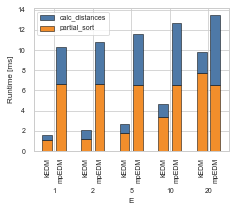

In [4]:
breakdown_v100 = pd.read_table("breakdown_v100.txt")
fig = plot_breakdown(breakdown_v100[breakdown_v100["L"] == 10000])

plt.show(fig)
fig.savefig("../figs/breakdown_v100.pdf", bbox_inches="tight", pad_inches=0)

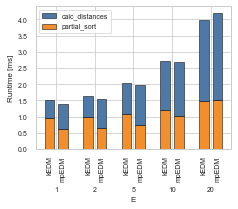

In [5]:
breakdown_epyc = pd.read_table("breakdown_epyc.txt")
fig = plot_breakdown(breakdown_epyc[breakdown_epyc["L"] == 10000])

plt.show(fig)
fig.savefig("../figs/breakdown_epyc.pdf", bbox_inches="tight", pad_inches=0)